<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(2_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.8_n20.csv',
 'data_multi_delta_2.8_n30.csv',
 'data_multi_delta_2.8_n60.csv',
 'data_multi_delta_2.8_n120.csv',
 'data_multi_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,23.644492,77.894610,188.779098,300.318200,316.951918,-16.633718
1,0.0,1.0,26.366540,60.980926,-72.447757,24.899709,258.333206,-233.433497
2,0.0,2.0,64.791385,82.782730,-13.278912,144.295203,174.954871,-30.659667
3,0.0,3.0,99.647616,46.824468,155.691985,312.164069,-59.846771,372.010840
4,0.0,4.0,21.501393,31.575812,-122.671349,-59.594144,192.799143,-252.393287
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,97.889772,28.811952,76.963330,213.665055,116.840531,96.824524
19996,999.0,16.0,27.032950,30.383104,-89.582899,-22.166846,183.230262,-205.397108
19997,999.0,17.0,23.189702,23.365608,-41.790894,14.764416,190.426075,-175.661658
19998,999.0,18.0,62.053021,66.480733,194.996963,333.530716,131.755083,201.775633


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,23.644492,77.894610,188.779098,300.318200,316.951918,-16.633718
1,0.0,1.0,26.366540,60.980926,-72.447757,24.899709,258.333206,-233.433497
2,0.0,2.0,64.791385,82.782730,-13.278912,144.295203,174.954871,-30.659667
3,0.0,3.0,99.647616,46.824468,155.691985,312.164069,-59.846771,372.010840
4,0.0,4.0,21.501393,31.575812,-122.671349,-59.594144,192.799143,-252.393287
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,97.889772,28.811952,76.963330,213.665055,116.840531,96.824524
19996,999.0,16.0,27.032950,30.383104,-89.582899,-22.166846,183.230262,-205.397108
19997,999.0,17.0,23.189702,23.365608,-41.790894,14.764416,190.426075,-175.661658
19998,999.0,18.0,62.053021,66.480733,194.996963,333.530716,131.755083,201.775633


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    23.644492  77.894610  188.779098  300.318200  316.951918   
      1.0    26.366540  60.980926  -72.447757   24.899709  258.333206   
      2.0    64.791385  82.782730  -13.278912  144.295203  174.954871   
      3.0    99.647616  46.824468  155.691985  312.164069  -59.846771   
      4.0    21.501393  31.575812 -122.671349  -59.594144  192.799143   
...                ...        ...         ...         ...         ...   
999.0 15.0   97.889772  28.811952   76.963330  213.665055  116.840531   
      16.0   27.032950  30.383104  -89.582899  -22.166846  183.230262   
      17.0   23.189702  23.365608  -41.790894   14.764416  190.426075   
      18.0   62.053021  66.480733  194.996963  333.530716  131.755083   
      19.0   85.773013  71.422529  -48.235063  118.960479  106.763128   

                  e_hat  
rep   index              
0.0   0.0    -16.633718  
      1.0   -233.433497  
      2.0    -30.659667  
      3.0    372.010840  
      4.0   -252.393287  
...                 ...  
999.0 15.0    96.824524  
      16.0  -205.397108  
      17.0  -175.661658  
      18.0   201.775633  
      19.0    12.197351  

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    23.644492  77.894610  188.779098  300.318200  316.951918   
      1.0    26.366540  60.980926  -72.447757   24.899709  258.333206   
      2.0    64.791385  82.782730  -13.278912  144.295203  174.954871   
      3.0    99.647616  46.824468  155.691985  312.164069  -59.846771   
      4.0    21.501393  31.575812 -122.671349  -59.594144  192.799143   
...                ...        ...         ...         ...         ...   
999.0 15.0   97.889772  28.811952   76.963330  213.665055  116.840531   
      16.0   27.032950  30.383104  -89.582899  -22.166846  183.230262   
      17.0   23.189702  23.365608  -41.790894   14.764416  190.426075   
      18.0   62.053021  66.480733  194.996963  333.530716  131.755083   
      19.0   85.773013  71.422529  -48.235063  118.960479  106.763128   

                  e_hat  
rep   index              
0.0   0.0    -16.633718  
      1.0   -233.433497  
      2.0    -30.659667  
      3.0    372.010840  
      4.0   -252.393287  
...                 ...  
999.0 15.0    96.824524  
      16.0  -205.397108  
      17.0  -175.661658  
      18.0   201.775633  
      19.0    12.197351  

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,23.644492,77.894610,188.779098,300.318200,316.951918,-16.633718
1,0.0,1.0,26.366540,60.980926,-72.447757,24.899709,258.333206,-233.433497
2,0.0,2.0,64.791385,82.782730,-13.278912,144.295203,174.954871,-30.659667
3,0.0,3.0,99.647616,46.824468,155.691985,312.164069,-59.846771,372.010840
4,0.0,4.0,21.501393,31.575812,-122.671349,-59.594144,192.799143,-252.393287
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,97.889772,28.811952,76.963330,213.665055,116.840531,96.824524
19996,999.0,16.0,27.032950,30.383104,-89.582899,-22.166846,183.230262,-205.397108
19997,999.0,17.0,23.189702,23.365608,-41.790894,14.764416,190.426075,-175.661658
19998,999.0,18.0,62.053021,66.480733,194.996963,333.530716,131.755083,201.775633


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    23.644492  77.894610  188.779098  300.318200  316.951918   
      1.0    26.366540  60.980926  -72.447757   24.899709  258.333206   
      2.0    64.791385  82.782730  -13.278912  144.295203  174.954871   
      3.0    99.647616  46.824468  155.691985  312.164069  -59.846771   
      4.0    21.501393  31.575812 -122.671349  -59.594144  192.799143   
...                ...        ...         ...         ...         ...   
999.0 15.0   97.889772  28.811952   76.963330  213.665055  116.840531   
      16.0   27.032950  30.383104  -89.582899  -22.166846  183.230262   
      17.0   23.189702  23.365608  -41.790894   14.764416  190.426075   
      18.0   62.053021  66.480733  194.996963  333.530716  131.755083   
      19.0   85.773013  71.422529  -48.235063  118.960479  106.763128   

                  e_hat  
rep   index              
0.0   0.0    -16.633718  
      1.0   -233.433497  
      2.0    -30.659667  
      3.0    372.010840  
      4.0   -252.393287  
...                 ...  
999.0 15.0    96.824524  
      16.0  -205.397108  
      17.0  -175.661658  
      18.0   201.775633  
      19.0    12.197351  

[20000 rows x 6 columns]

<AxesSubplot:xlabel='x2', ylabel='e'>

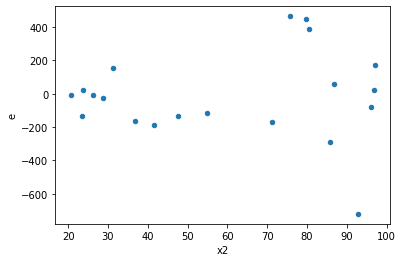

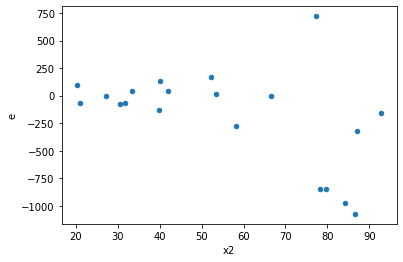

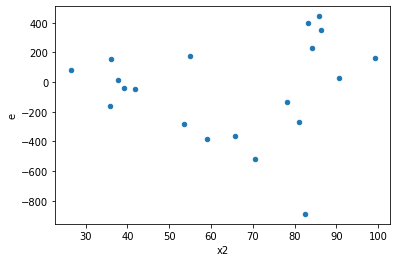

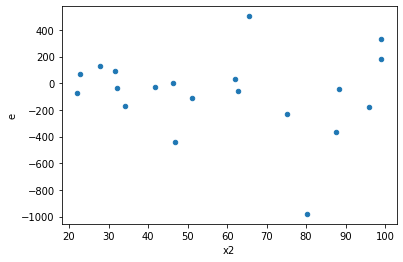

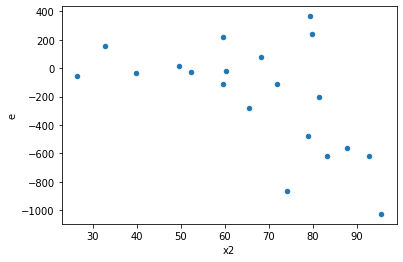

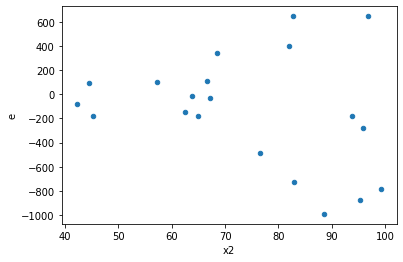

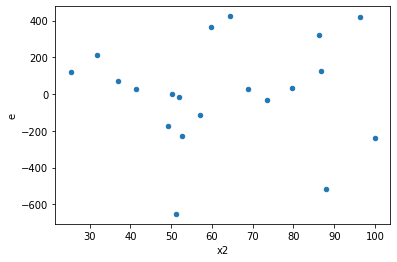

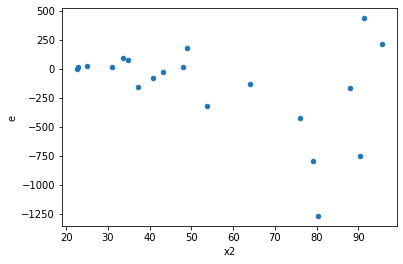

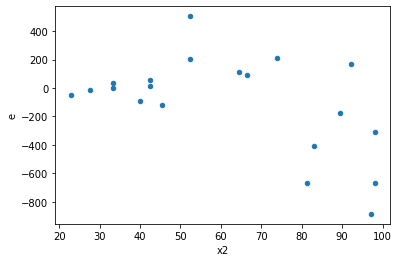

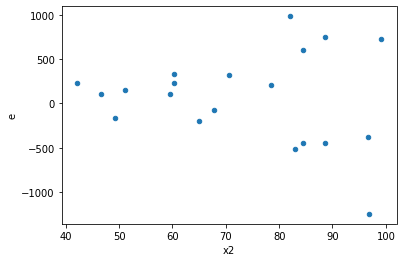

In [12]:
tablenew0 = table.loc[4.0]
tablenew1 = table.loc[6.0]
tablenew2 = table.loc[7.0]
tablenew3 = table.loc[9.0]
tablenew4 = table.loc[10.0]
tablenew5 = table.loc[26.0]
tablenew6 = table.loc[31.0]
tablenew7 = table.loc[32.0]
tablenew8 = table.loc[36.0]
tablenew9 = table.loc[38.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

<ipython-input-14-7bd20896c3a8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity'


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,6.0,6.0,125345.97390001002,876523.918234573,20890.99565000167,146087.31970576217,6.9928366341769115,0.032184964621027934,0.983907517689486,0.016092482310513967,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,202498.8120184084,600890.1526893064,33749.80200306807,100148.35878155107,2.9673761870498367,0.21139135808415888,0.8943043209579206,0.10569567904207944,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,57789.350525899834,780702.200978684,9631.558420983305,130117.03349644733,13.509447569042873,0.00588929918808323,0.9970553504059584,0.002944649594041615,Reject001=0 : Heteroscedasticity
7.0,6.0,6.0,35160.666606973915,1305845.8968238146,5860.111101162319,217640.9828039691,37.13939531979202,0.00034647309231483625,0.9998267634538426,0.00017323654615741813,Reject001=0 : Heteroscedasticity
8.0,6.0,6.0,203462.42000111018,1041028.6395473643,33910.40333351836,173504.77325789406,5.116564717659822,0.06736743019475488,0.9663162849026226,0.03368371509737744,Reject001=1 : Homoscedasticity
11.0,6.0,6.0,122833.0196423392,521081.15511545027,20472.169940389867,86846.85918590838,4.24219120097117,0.1021382645214437,0.9489308677392781,0.05106913226072185,Reject001=1 : Homoscedasticity
12.0,6.0,6.0,425045.8868293325,839644.6012915097,70840.98113822208,139940.76688191827,1.9754210717221923,0.42794531669698044,0.7860273416515098,0.21397265834849022,Reject001=1 : Homoscedasticity
15.0,6.0,6.0,213959.15031089183,375853.5255738724,35659.85838514864,62642.25426231206,1.7566602083983838,0.5106076273700002,0.7446961863149999,0.2553038136850001,Reject001=1 : Homoscedasticity
16.0,6.0,6.0,75644.58702979302,544829.8336848958,12607.43117163217,90804.97228081596,7.202495975955446,0.029936188142494657,0.9850319059287527,0.014968094071247329,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,671419.0326536448,116405.5435247505,111903.1721089408,19400.92392079175,0.17337242148868148,0.051061600667294656,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,1792623.5642360847,619953.0243188818,298770.59403934743,103325.50405314697,0.3458355879546139,0.22199983094078365,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,125345.97390001002,876523.918234573,20890.99565000167,146087.31970576217,6.9928366341769115,0.032184964621027934,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,202498.8120184084,600890.1526893064,33749.80200306807,100148.35878155107,2.9673761870498367,0.21139135808415888,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,57789.350525899834,780702.200978684,9631.558420983305,130117.03349644733,13.509447569042873,0.00588929918808323,Reject001=0 : Heteroscedasticity
5.0,6.0,6.0,1129945.6361562714,160429.2521418889,188324.2726927119,26738.208690314816,0.14197962008829026,0.03162410611325987,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,2302469.547927383,47676.89897419889,383744.92465456383,7946.149829033148,0.02070685322075867,0.00016194177908633627,Reject001=0 : Heteroscedasticity
7.0,6.0,6.0,35160.666606973915,1305845.8968238146,5860.111101162319,217640.9828039691,37.13939531979202,0.00034647309231483625,Reject001=0 : Heteroscedasticity
8.0,6.0,6.0,203462.42000111018,1041028.6395473643,33910.40333351836,173504.77325789406,5.116564717659822,0.06736743019475488,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      779
Reject001=0 : Heteroscedasticity    221
Name: Result_test, dtype: int64